In [208]:
import pandas as pd
import seaborn as sns

In [209]:
dados = pd.read_csv('../data/flights_noise2.csv')

In [210]:
dados

flight_id airline aircraft_type      schengen origin  arrival_time  \
0             21      KE   Airbus A330      schengen    ISK      8.890184   
1             12      KE   Airbus A320      schengen    CXP      7.088451   
2             20      KI    Boeing 777  non-schengen    ISK     20.953659   
3             15      KE    Boeing 787      schengen    NDB      7.877261   
4             27      KE    Boeing 787  non-schengen    NDB     10.949233   
...          ...     ...           ...           ...    ...           ...   
71170          3      KE    Boeing 787      schengen    HRR     10.949202   
71171         14      UI   Airbus A330      schengen    BUV      7.841779   
71172         20      KI    Boeing 777  non-schengen    ISK     20.953659   
71173         10      UI   Airbus A330  non-schengen    HRR     17.238087   
71174         18      KE   Airbus A330  non-schengen    CXP     17.493294   

       departure_time  day  year  is_holiday      delay  
0           12.890184    0  2010       False  36.675283  
1           11.088451    0  2010       False  65.466498  
2           22.953659    0  2010       False  69.671961  
3           12.877261    0  2010       False   1.590387  
4           12.949233    0  2010       False   9.527662  
...               ...  ...   ...         ...        ...  
71170       12.949202  364  2022       False  29.095760  
71171       12.841779  364  2022       False  45.244985  
71172       22.953659  364  2022       False  41.909706  
71173       22.238087  364  2022       False  30.551160  
71174       19.493294  364  2022       False  26.833552  

[71175 rows x 11 columns]

In [211]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [212]:
dados['delay']

0        36.675283
1        65.466498
2        69.671961
3         1.590387
4         9.527662
           ...    
71170    29.095760
71171    45.244985
71172    41.909706
71173    30.551160
71174    26.833552
Name: delay, Length: 71175, dtype: float64

In [213]:
from datetime import datetime, timedelta

In [214]:
def convert_day_to_date(day, year):
    base_date = datetime(year=year, month=1, day=1)
    target_date = base_date + timedelta(days=day)
    return target_date.strftime('%Y-%m-%d')  # Format the date as desired

# Convert 'day' column to regular dates
dados['date'] = dados.apply(lambda row: convert_day_to_date(row['day'], row['year']), axis=1)

In [215]:
dados

flight_id airline aircraft_type      schengen origin  arrival_time  \
0             21      KE   Airbus A330      schengen    ISK      8.890184   
1             12      KE   Airbus A320      schengen    CXP      7.088451   
2             20      KI    Boeing 777  non-schengen    ISK     20.953659   
3             15      KE    Boeing 787      schengen    NDB      7.877261   
4             27      KE    Boeing 787  non-schengen    NDB     10.949233   
...          ...     ...           ...           ...    ...           ...   
71170          3      KE    Boeing 787      schengen    HRR     10.949202   
71171         14      UI   Airbus A330      schengen    BUV      7.841779   
71172         20      KI    Boeing 777  non-schengen    ISK     20.953659   
71173         10      UI   Airbus A330  non-schengen    HRR     17.238087   
71174         18      KE   Airbus A330  non-schengen    CXP     17.493294   

       departure_time  day  year  is_holiday      delay        date  
0           12.890184    0  2010       False  36.675283  2010-01-01  
1           11.088451    0  2010       False  65.466498  2010-01-01  
2           22.953659    0  2010       False  69.671961  2010-01-01  
3           12.877261    0  2010       False   1.590387  2010-01-01  
4           12.949233    0  2010       False   9.527662  2010-01-01  
...               ...  ...   ...         ...        ...         ...  
71170       12.949202  364  2022       False  29.095760  2022-12-31  
71171       12.841779  364  2022       False  45.244985  2022-12-31  
71172       22.953659  364  2022       False  41.909706  2022-12-31  
71173       22.238087  364  2022       False  30.551160  2022-12-31  
71174       19.493294  364  2022       False  26.833552  2022-12-31  

[71175 rows x 12 columns]

In [216]:
import plotly.express as px

In [217]:
px.line(dados[dados['year']==2018], x = 'date', y = 'delay', color = 'airline')

In [218]:
px.histogram(dados, x = 'delay')

In [219]:
px.histogram(dados, x = 'delay', color = 'airline')

In [220]:
px.histogram(dados, x = 'delay', color = 'aircraft_type')

In [221]:
px.histogram(dados, x = 'delay', color = 'origin')

In [222]:
dados['delay'].mean()

17.071611010697268

In [223]:
dados['delay'].median()

14.331178756485205

In [224]:
dados['airline'].value_counts()

airline
KE    49811
UI    14295
KI     7069
Name: count, dtype: int64

In [225]:
dados.groupby('origin')['delay'].mean()

origin
BUV    19.025256
CXP    14.502854
HRR    30.740079
ISK    31.806327
JGK    22.687278
LLS    -0.668648
NDB    -4.010281
OTL    20.687819
Name: delay, dtype: float64

In [226]:
dados.groupby('aircraft_type')['delay'].mean()

aircraft_type
Airbus A320     33.524475
Airbus A330      9.988437
Boeing 737      40.971560
Boeing 777      27.093911
Boeing 787       7.495599
Embraer E175    -1.673565
Name: delay, dtype: float64

In [227]:
dados.groupby('airline')['delay'].mean()

airline
KE    13.216373
KI    55.606321
UI    11.449462
Name: delay, dtype: float64

In [228]:
sns.__version__

'0.11.2'

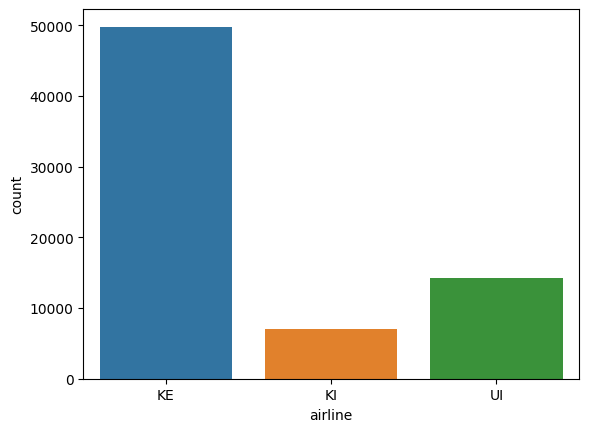

In [229]:
_ = sns.countplot(x=dados['airline'])

In [230]:
dados['aircraft_type'].value_counts()

aircraft_type
Airbus A330     18917
Airbus A320     14124
Boeing 787      12009
Embraer E175    11946
Boeing 737       7093
Boeing 777       7086
Name: count, dtype: int64

c:\Users\Igor\Documents\GitHub\data_flight_delays\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='aircraft_type', ylabel='count'>

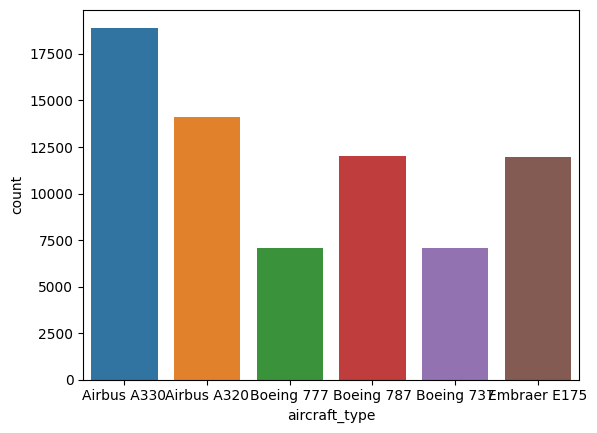

In [231]:
sns.countplot(dados['aircraft_type'])

In [232]:
dados['origin'].value_counts()

origin
BUV    16445
HRR    11874
OTL     9551
NDB     9489
LLS     7215
CXP     7148
ISK     7057
JGK     2396
Name: count, dtype: int64

c:\Users\Igor\Documents\GitHub\data_flight_delays\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='origin', ylabel='count'>

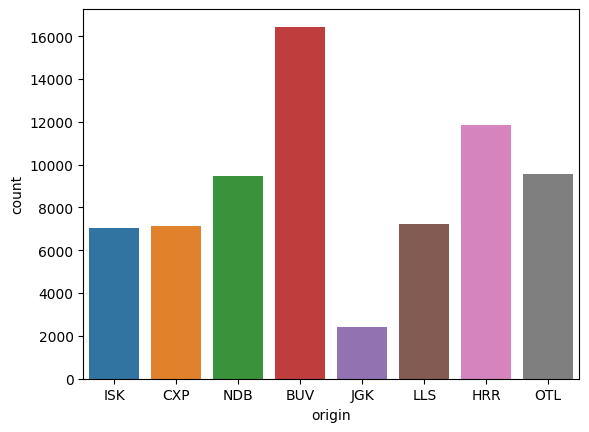

In [233]:
sns.countplot(dados['origin'])

In [234]:
dados['schengen'].value_counts(normalize= True)

schengen
schengen        0.73398
non-schengen    0.26602
Name: proportion, dtype: float64

c:\Users\Igor\Documents\GitHub\data_flight_delays\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='schengen', ylabel='count'>

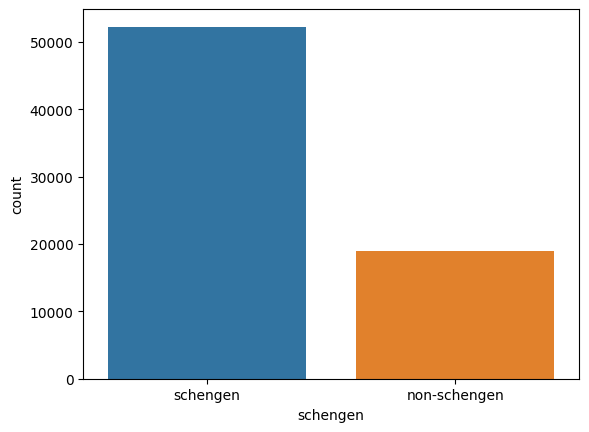

In [235]:
sns.countplot(dados['schengen'])

OptionError: No such keys(s): 'mode.use_inf_as_null'

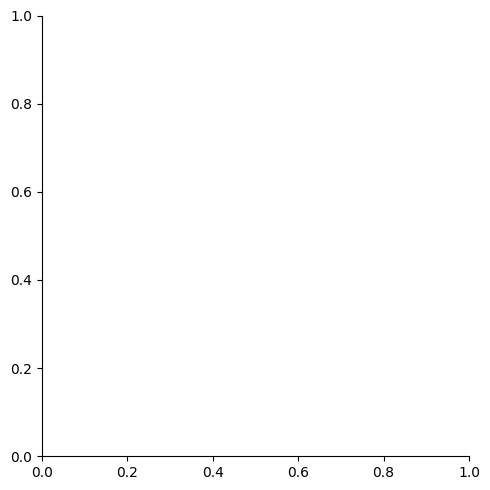

In [236]:
sns.displot(dados['delay'])

In [ ]:
sns.displot(dados['arrival_time'])

In [ ]:
sns.displot(dados['departure_time'])

In [ ]:
sns.boxplot(dados['delay'])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
categorical_vars = ['airline', 'aircraft_type', 'origin']

# Perform one-hot encoding
df_encoded_4 = pd.get_dummies(dados, columns=categorical_vars, dtype=int)

df_encoded_4['is_holiday'] = df_encoded_4['is_holiday'].map({False: 0, True: 1})
df_encoded_4['schengen'] = df_encoded_4['schengen'].map({'non-schengen': 0, 'schengen': 1})
df_encoded_4['is_weekend'] = df_encoded_4['day'].apply(lambda day: day % 7 == 0 or day % 7 == 6)

X = df_encoded_4.drop(['flight_id', 'day', 'year','departure_time', 'delay', 'date'], axis=1)
y = df_encoded_4['delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state=42

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

model = RandomForestRegressor()
rfe = RFE(model)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

In [ ]:
model_boosting = GradientBoostingRegressor()
model_boosting.fit(X_train, y_train)

y_pred = model_boosting.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

In [ ]:
!python -m pip install statsmodels

In [ ]:
px.scatter(x = y_test, y = y_pred, trendline = 'ols', trendline_color_override = 'red',opacity = 0.2)

In [ ]:
px.scatter(x = y_pred, y = (y_pred - y_test), trendline = 'ols', trendline_color_override = 'red',opacity = 0.2)

In [ ]:
import seaborn as sns

In [ ]:
from scipy.stats import skewnorm
import numpy as np

In [ ]:
a = 5

In [ ]:
r = skewnorm.rvs(a, size=1000)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a),
                skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='skewnorm pdf')
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()